# Regression / GPUs Dataset Analysis

<b>Note:</b> Using regression models we will try to predict how powerfull will Graphics Cards be in 2025. 

### Moore's law: Number of transistors in a dense integrated circuit doubles approximately every two years. 

<img src='https://upload.wikimedia.org/wikipedia/commons/f/fe/GeForce4_Ti_4800SE_NV28_GPU.jpg'>

# Table of Contents

* [1. Importing dataset and data preprocessing](#importing_dataset_and_data_preprocessing) <br>
   * [1.1. Dataset import](#dataset_import) <br>
   * [1.2. Let's summarize the Dataset](#lets_summarize_the_dataset) <br>
   * [1.3. Data preprocessing & feature engineering](#data_preprocessing) <br>
<br>
* [2. Basic data visualization](#basic_data_visualization) <br>
   * [2.1. Grouping GPUs by Release Year](#grouping_gpus_by_release_year) <br>
   * [2.2. GPU Memory vs Year of Release by Manufacturer](#gpu_memory_vs_year_of_release_by_manufacturer) <br>
   * [2.3. GPU manufacturers market share](#gpu_manufacturers_market_share) <br>
<br>
* [3. GPU Memory](#gpu_memory) <br>
    * [3.1. GPU Memory vs Year of Release (Scatter Plot)](#gpu_memory_vs_year_of_release) <br>
    * [3.2. Mean GPU Memory vs Year of Release (Line Plot)](#mean_gpu_memory_vs_year_of_release) <br>
    * [3.3. Polynomial regression prediction model](#polynomial_regression_prediction_model) <br>
    * [3.4. Predicting GPUs mean memory size in 2025](#predicting_gpus_mean_memory_size_in_2025) <br>
<br>
* [4. Bibliography](#bibliography) <br>

## 1. Importing dataset and data preprocessing
<a id="importing_dataset_and_data_preprocessing"></a>

### 1.1. Dataset import
<a id="dataset_import"></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
# Let's import dataset from csv file
dataset = pd.read_csv('../00_Datasets/GPUs/All_GPUs.csv')

### 1.2. Let's try to summarize the Dataset
<a id="lets_summarize_the_dataset"></a>

In [4]:
dataset.head(100)

,Architecture,Best_Resolution,Boost_Clock,Core_Speed,DVI_Connection,Dedicated,Direct_X,DisplayPort_Connection,HDMI_Connection,Integrated,...,Process,ROPs,Release_Date,Release_Price,Resolution_WxH,SLI_Crossfire,Shader,TMUs,Texture_Rate,VGA_Connection
0,Tesla G92b,NaN,NaN,738 MHz,2.0,Yes,DX 10.0,NaN,0.0,No,...,55nm,16,\n01-Mar-2009,NaN,2560x1600,Yes,4.0,64.0,47 GTexel/s,0.0
1,R600 XT,1366 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,...,80nm,16,\n14-May-2007,NaN,2560x1600,Yes,4.0,16.0,12 GTexel/s,0.0
2,R600 PRO,1366 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,...,80nm,16,\n07-Dec-2007,NaN,2560x1600,Yes,4.0,16.0,10 GTexel/s,0.0
3,RV630,1024 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,...,65nm,4,\n01-Jul-2007,NaN,2560x1600,Yes,4.0,8.0,7 GTexel/s,0.0
4,RV630,1024 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,...,65nm,4,\n28-Jun-2007,NaN,2560x1600,Yes,4.0,8.0,6 GTexel/s,0.0
5,RV630,1024 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,...,65nm,4,\n26-Jun-2007,NaN,2560x1600,Yes,4.0,8.0,6 GTexel/s,0.0
6,R700 RV790 XT,1920 x 1080,NaN,870 MHz,1.0,Yes,DX 10.1,NaN,1.0,No,...,55nm,16,\n13-Jul-2009,NaN,2560x1600,Yes,4.1,40.0,35 GTexel/s,1.0
7,R600 GT,1024 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,...,80nm,12,\n06-Nov-2007,NaN,2560x1600,Yes,4.0,12.0,7 GTexel/s,0.0
8,Pitcairn XT GL,1920 x 1080,NaN,\n-,0.0,Yes,DX 11.2,NaN,0.0,No,...,28nm,32,\n18-Jan-2014,NaN,4096x2160,Yes,5.0,80.0,62 GTexel/s,0.0
9,RV100,NaN,NaN,\n-,NaN,Yes,DX 7,NaN,NaN,No,...,NaN,NaN,\n02-Jan-2001,NaN,1600x1200,No,1.0,NaN,NaN,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 34 columns):
Architecture              3344 non-null object
Best_Resolution           2764 non-null object
Boost_Clock               1446 non-null object
Core_Speed                3406 non-null object
DVI_Connection            2656 non-null float64
Dedicated                 3392 non-null object
Direct_X                  3400 non-null object
DisplayPort_Connection    857 non-null float64
HDMI_Connection           2643 non-null float64
Integrated                3392 non-null object
L2_Cache                  3406 non-null object
Manufacturer              3406 non-null object
Max_Power                 2781 non-null object
Memory                    2986 non-null object
Memory_Bandwidth          3285 non-null object
Memory_Bus                3344 non-null object
Memory_Speed              3301 non-null object
Memory_Type               3350 non-null object
Name                      3406 non-null objec

<b> NOTE: </b> Right away we can see that there is lots of undefined values. Let's use "Missingno" package which is a most useful and convenient tool in visualising missing values in the dataset. There are only few columns that can by use as reliable source of information for our analysis. Most of columns are incomplete or in wrong format. We will perform data preprocessing to make some columns usefull in our analysis.

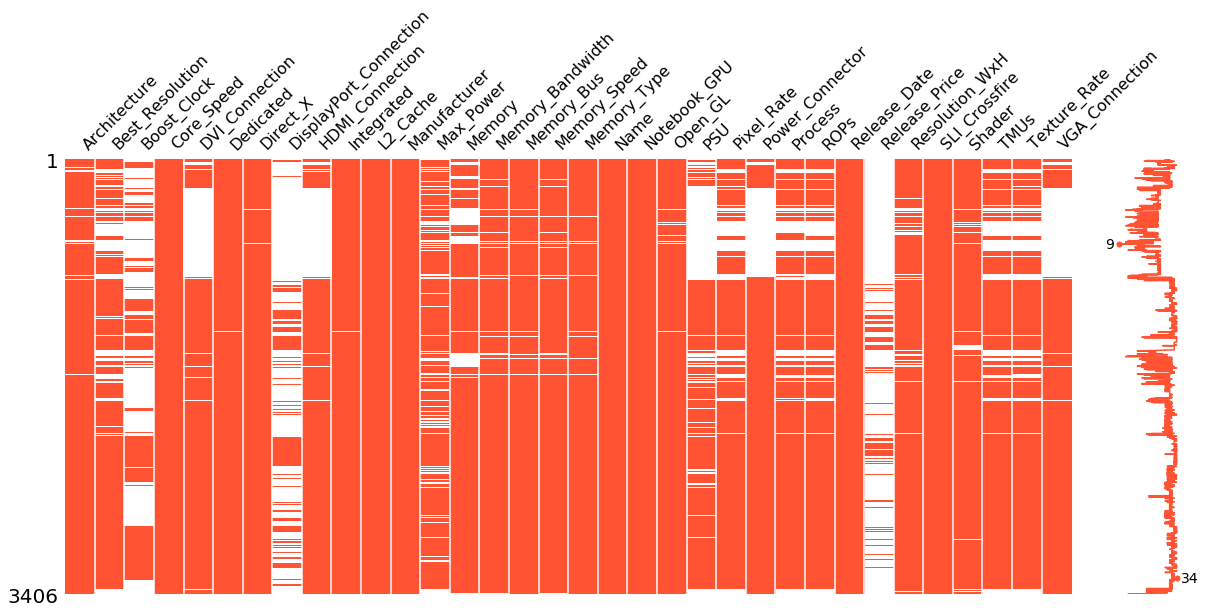

In [8]:
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=dataset, figsize=(20, 8), color=(255/255, 83/255, 51/255))

### 1.3. Data preprocessing & feature engineering
<a id="data_preprocessing"></a>

In [9]:
dataset['Release_Date']=dataset['Release_Date'].str[1:-1]
dataset=dataset[dataset['Release_Date'].str.len()==11]
dataset['Release_Date']=pd.to_datetime(dataset['Release_Date'], format='%d-%b-%Y')
dataset['Release_Year']=dataset['Release_Date'].dt.year
dataset['Release_Month']=dataset['Release_Date'].dt.month
dataset['Release']=dataset['Release_Year'] + dataset['Release_Month']/12

In [10]:
dataset['Memory'] = dataset['Memory'].str[:-3].fillna(0).astype(int)

In [11]:
def countPixels(x):
    if pd.isnull(x):
        return 800*600;
    else:
        values = x.split(' x ')
        return(int(values[0]) * int(values[1]))

dataset['PixelNum'] = dataset['Best_Resolution'].apply(lambda x: countPixels(x))

## 2. Basic data visualization
<a id="basic_data_visualization"></a>

### 2.1. Grouping GPUs by Release Year
<a id="grouping_gpus_by_release_year"></a>

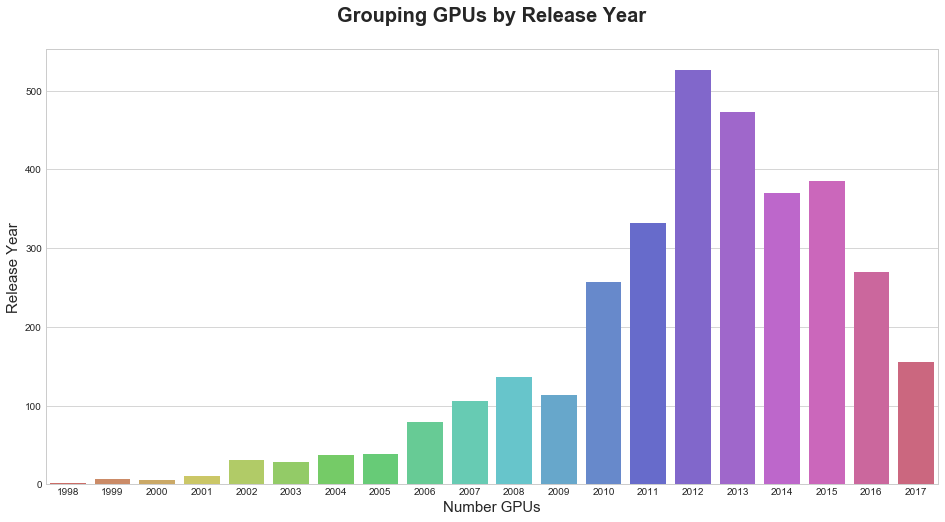

In [12]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
sns.countplot(x="Release_Year", data=dataset, palette="hls");
plt.title('Grouping GPUs by Release Year', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number GPUs', fontsize=15)
plt.ylabel('Release Year', fontsize=15)
plt.show()

### 2.2. GPU Memory vs Year of Release by Manufacturer
<a id="gpu_memory_vs_year_of_release_by_manufacturer"></a>

In [114]:
data = []

for manufacturer in dataset['Manufacturer'].unique():
    
    trace_dataset = dataset.loc[dataset['Manufacturer'] == manufacturer]
    
    trace = go.Scatter(
        x = trace_dataset['Release_Year'],
        y = trace_dataset['Memory'],
        mode = 'markers',
        name = manufacturer,
        marker= dict(symbol="circle",
                    size = trace_dataset['PixelNum']/100000,
                    opacity = 0.4,
                    line= dict(width=1,
                               color = 'rgb(255, 255, 255)'
                              ),
        ),
        text= dataset['Name']
    )
    
    data.append(trace)
    
layout = dict(title = 'GPU Memory vs Year of Release by Manufacturer',
              width=1000,
              height=800,
              paper_bgcolor='rgb(243, 243, 243)',
              plot_bgcolor='rgb(243, 243, 243)',
              yaxis = dict(title= 'GPUs Memory',
                           ticklen= 5,
                           gridcolor='rgb(255, 255, 255)',
                           gridwidth= 2),
              xaxis = dict(title= 'Year of Release',
                           ticklen= 5,
                           gridcolor='rgb(255, 255, 255)',
                           gridwidth= 2)
             )

fig= go.Figure(data=data, layout=layout)
py.iplot(fig)

<b>NOTE:</b> Circle size represents maximum resolution that is supported by GPU.

### 2.3. GPU manufacturers market share
<a id="gpu_manufacturers_market_share"></a>

In [112]:
# Transformed dataset - counting how many GPUs were made by each manufacturer each year
market_share = dataset.reset_index().groupby(['Release_Year','Manufacturer'])["index"].count().reset_index(name="count")
# Transformed dataset - counting how many GPUs were made each year
market_share['Sum_By_Year']  = market_share['count'].groupby(market_share["Release_Year"]).transform('sum')
# List that will hold our data dictionaries
data = []

markers = [
    dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    ),
    dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    ),
    dict(
        color='rgba(0, 168, 107, 0.7)',
        line=dict(
            color='rgba(0, 168, 107, 1.0)',
            width=2,
        )
    ),
    dict(
        color='rgba(250, 92, 0, 0.7)',
        line=dict(
            color='rgba(250, 92, 0, 1.0)',
            width=2,
        )
    )
]

for i, manufacturer in enumerate(dataset['Manufacturer'].unique()):
    
    trace_dataset = market_share.loc[market_share['Manufacturer'] == manufacturer]
    
    
    trace = go.Bar(
        x = trace_dataset['Release_Year'],
        y = round(trace_dataset['count'] / trace_dataset['Sum_By_Year'] * 100, 2),
        name= manufacturer,
        marker = markers[i],
    )
    
    data.append(trace)
    
layout = go.Layout(
    barmode='stack',
    title = 'GPU manufacturers market share',
    width=1000,
    height=500,
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    yaxis = dict(title= 'Manufacturers market share [%]'),
    xaxis = dict(title= 'Manufacturers')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

<b>NOTE:</b> It is very likely that dataset for years 2016/2017 is incomplete.

## 3. GPU Memory
<a id="gpu_memory"></a>

### 3.1. GPU Memory vs Year of Release (Scatter Plot)
<a id="gpu_memory_vs_year_of_release"></a>

<b>NOTE:</b> Firstly, lets prepere simple scatter plot and look at relation between year of release and memory size of GPU.

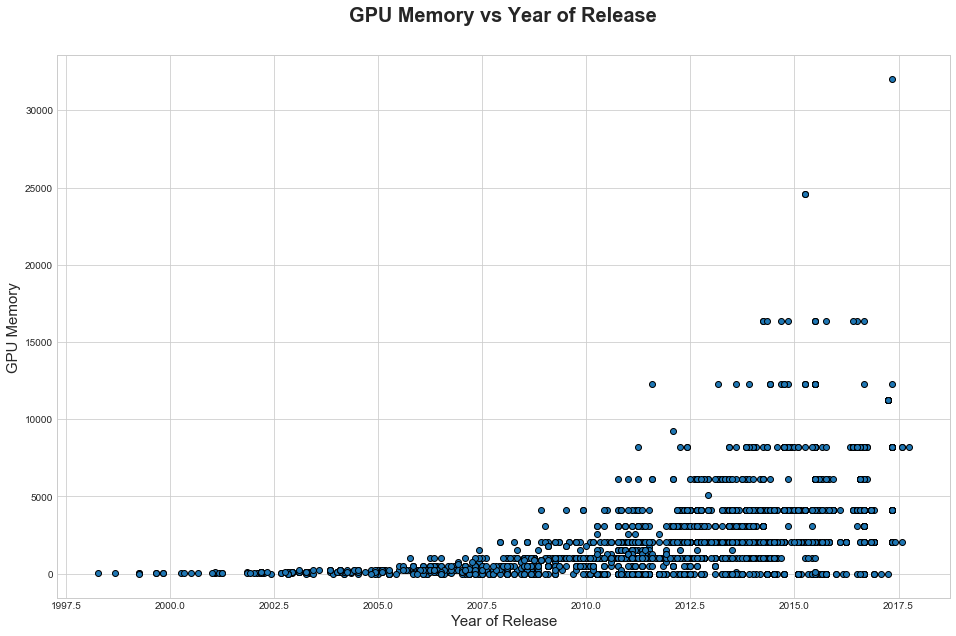

In [14]:
plt.figure(figsize=(16,10))
sns.set_style("whitegrid")
plt.title('GPU Memory vs Year of Release', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Year of Release', fontsize=15)
plt.ylabel('GPU Memory', fontsize=15)

years = dataset["Release"].values
memory = dataset["Memory"].values

plt.scatter(years, memory, edgecolors='black')
plt.show()

### 3.2. Mean GPU Memory vs Year of Release (Line Plot)
<a id="mean_gpu_memory_vs_year_of_release"></a>

<b>NOTE:</b> Now we will calculate mean and median Memory Size of GPU for each year and create line plots to visualize the upward trend. Right away we see that Moore's law quite accurate.

In [58]:
# Numpy array that holds unique release year values
year_arr = dataset.sort_values("Release_Year")['Release_Year'].unique()
# Numpy array that holds mean values of GPUs memory for each year
memory_arr_mean = dataset.groupby('Release_Year')['Memory'].mean().values
# Numpy array that holds median values of GPUs memory for each year
memory_arr_median = dataset.groupby('Release_Year')['Memory'].median().values

# Minimal value of release year from dataset
year_min = year_arr[0]
# Median size of memory in year_min
memory_min = memory_arr_median[0]

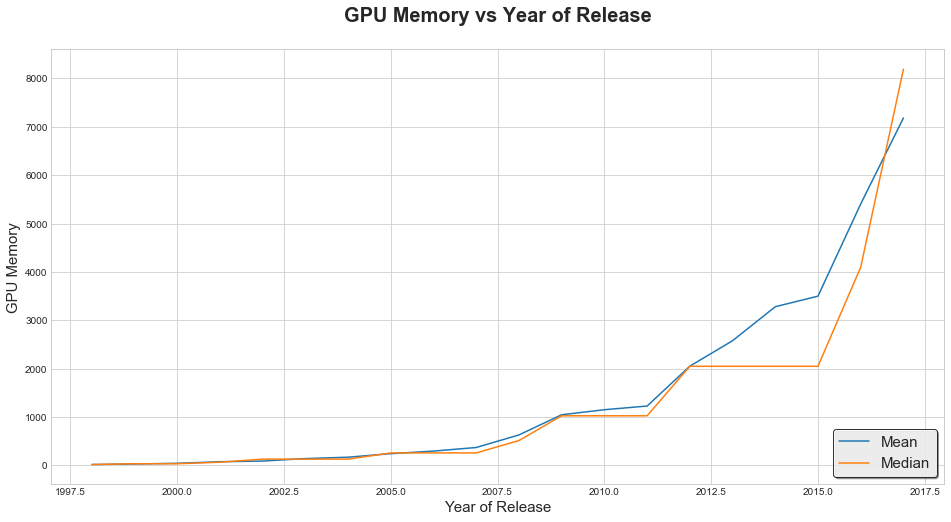

In [62]:
plt.figure()
plt.figure(figsize=(16,8))
plt.title('GPU Memory vs Year of Release', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Year of Release', fontsize=15)
plt.ylabel('GPU Memory', fontsize=15)
sns.set_style("whitegrid")
plt.plot(year_arr, memory_arr_mean, label="Mean")
plt.plot(year_arr, memory_arr_median, label="Median")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

<b>NOTE:</b> Let's see how above plot would look like in logarithmic scale. If Moore's law is acurate graph should be close to the straight line. As a matter of fact function that would represent memory size calculated using Moore's law taking into account the initial values would have the following form: 

$$f(x)=y_{min}2^{\frac{x-x_{min}}{2}}$$

Where: 
* $y_{min}$ - initial size of memory in MB, 
* $x_{min}$ - initial year of dataset.

In [61]:
# Short function to calculate size of memory based on Moore's law
def calculateMoorsValue(x, y_trans):
    return memory_arr_median[0] * 2**((x-y_trans)/2)

# Initiation of numpy array that will hold szies of memory calculeted using Moore's law
moore_law = np.zeros(year_arr.shape[0])

for i in range(year_arr.shape[0]):
    moore_law[i] = calculateMoorsValue(int(year_arr[i]), int(year_min))

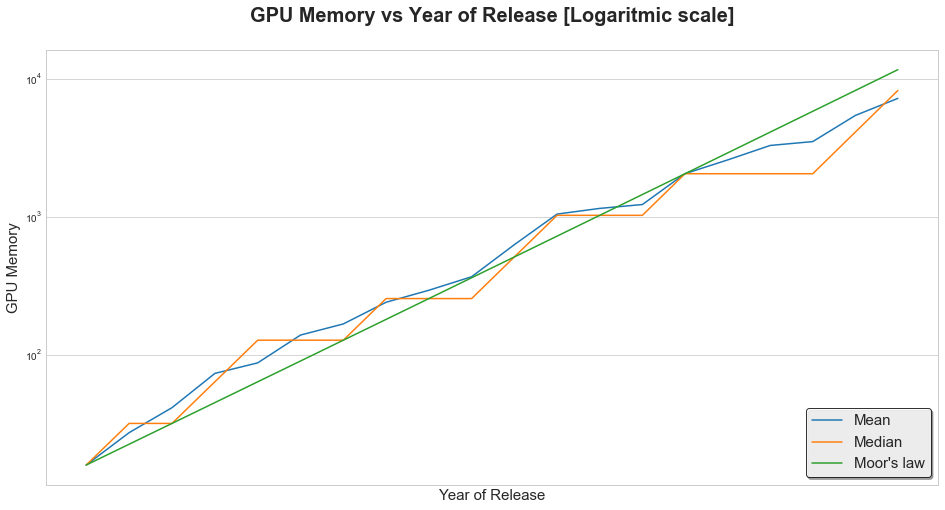

In [63]:
plt.figure()
plt.figure(figsize=(16,8))
plt.title('GPU Memory vs Year of Release [Logaritmic scale]', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Year of Release', fontsize=15)
plt.ylabel('GPU Memory', fontsize=15)
sns.set_style("whitegrid")
plt.loglog(year_arr, memory_arr_mean, label="Mean", basex= 2)
plt.loglog(year_arr, memory_arr_median, label="Median", basex= 2)
plt.loglog(year_arr, moore_law, label="Moor's law", basex= 2)
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

<b>NOTE:</b> As we can see, mean size of GPUs memory tends to follow Moor's law.

### 3.3. Polynomial regression prediction model
<a id="polynomial_regression_prediction_model"></a>

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Fitting Polynomial Regression to the dataset
poly_reg_2 = PolynomialFeatures(degree = 2, include_bias=False)
poly_reg_3 = PolynomialFeatures(degree = 3, include_bias=False)

X_poly_2 = poly_reg_2.fit_transform(year_arr.reshape(-1, 1))
X_poly_3 = poly_reg_3.fit_transform(year_arr.reshape(-1, 1))

lin_reg_2 = LinearRegression()
lin_reg_3 = LinearRegression()

lin_reg_2.fit(X_poly_2, memory_arr_mean)
lin_reg_3.fit(X_poly_3, memory_arr_mean)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

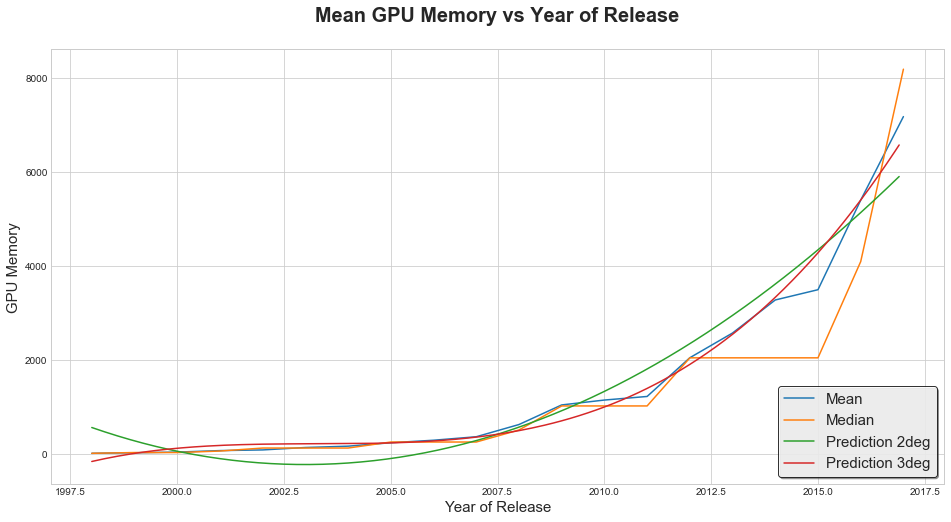

In [18]:
plt.figure()
plt.figure(figsize=(16,8))
X_grid = np.arange(min(year_arr), max(year_arr), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(year_arr, memory_arr_mean, label="Mean")
plt.plot(year_arr, memory_arr_median, label="Median")
plt.plot(X_grid, lin_reg_2.predict(poly_reg_2.fit_transform(X_grid)), label="Prediction 2deg")
plt.plot(X_grid, lin_reg_3.predict(poly_reg_3.fit_transform(X_grid)), label="Prediction 3deg")
plt.title('Mean GPU Memory vs Year of Release', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Year of Release', fontsize=15)
plt.ylabel('GPU Memory', fontsize=15)
sns.set_style("whitegrid")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [19]:
score_2 = lin_reg_2.score(X_poly_2, memory_arr_mean)
score_3 = lin_reg_3.score(X_poly_3, memory_arr_mean)
print('The coefficient R^2 for 2nd degree polynomial is equel = ' + str(score_2))
print('The coefficient R^2 for 3rd degree polynomial is equel = ' + str(score_3))
print('Lets select 3rd degree polynomial, becouse is seems to fit data better.')

The coefficient R^2 for 2nd degree polynomial is equel = 0.949268225996
The coefficient R^2 for 3rd degree polynomial is equel = 0.985326074617
Lets select 3rd degree polynomial, becouse is seems to fit data better.


### 3.4. Predicting GPUs mean memory size in 2025
<a id="predicting_gpus_mean_memory_size_in_2025"></a>

In [20]:
memory_2015 = lin_reg_3.predict(poly_reg_3.fit_transform(2025))
memory_2015

array([ 25863.28773117])

## 4. Bibliography
<a id="bibliography"></a>

1. Moore's law: https://en.wikipedia.org/wiki/Moore%27s_law
2. "Missingno" GitHub repository: https://github.com/ResidentMario/missingno
3. Polynomial regression theory: https://neutrium.net/mathematics/least-squares-fitting-of-a-polynomial/